In [ ]:
import bagpy
from bagpy import bagreader

br = bagreader('/data/dataset_ENVTACT_new2.bag')

KeyboardInterrupt: 

In [4]:
import os
import argparse

import cv2

import rosbag
from sensor_msgs.msg import Image
from tqdm.auto import tqdm
from cv_bridge import CvBridge

bag_file = '/data/dataset_ENVTACT_new2.bag'
output_dir = '/data/dataset_ENVTACT_new2/raw_images/'
image_topic = '/dvs/image_raw'

def main():
    """Extract a folder of images from a rosbag.
    """

    #print "Extract images from %s on topic %s into %s" % (args.bag_file,
      #                                                    args.image_topic, args.output_dir)

    bag = rosbag.Bag(bag_file, "r")
    bridge = CvBridge()
    count = 0
    for topic, msg, t in tqdm(bag.read_messages(topics=[image_topic])):
        cv_img = bridge.imgmsg_to_cv2(msg, desired_encoding="passthrough")

        cv2.imwrite(os.path.join(output_dir, "frame%06i.png" % count), cv_img)
        print("Wrote image %i" % count)

        count += 1

    bag.close()

    return

main()

0it [00:00, ?it/s]

ModuleNotFoundError: No module named 'cv_bridge.boost'

In [3]:
import tqdm

In [3]:
br.topic_table

,Topics,Types,Message Count,Frequency
0,/contact_angle,geometry_msgs/Vector3,161245,50.002432
1,/contact_status,std_msgs/Bool,161245,50.001836
2,/dvs/events,dvs_msgs/EventArray,97207,32.432024
3,/dvs/image_raw,sensor_msgs/Image,74760,24.748953
4,/sensor_depth,std_msgs/Float64,161245,50.002432


In [3]:
raw=br.message_by_topic('/dvs/image_raw')

In [3]:
import numpy as np
possible_angle = [0.0174532925, 0.034906585, 0.0523598776, 0.075, 0.095, 0.115, 0.135, 0.15]#[0.075, 0.15]#
N_examples = 9
list_of_rotations = [[0, 0, 0]]

for i in range(1, N_examples):
    theta = i * 2 * np.pi/(N_examples - 1)
    for phi in possible_angle:
        rx = phi * np.cos(theta)
        ry = phi * np.sin(theta)
        rotvec = [rx, ry, 0]
        list_of_rotations.append(rotvec)

print(len(list_of_rotations))
print(list_of_rotations)

65
[[0, 0, 0], [0.01234134148078231, 0.012341341480782309, 0], [0.02468268296156462, 0.024682682961564617, 0], [0.03702402451305761, 0.037024024513057606, 0], [0.053033008588991064, 0.05303300858899106, 0], [0.06717514421272203, 0.06717514421272201, 0], [0.08131727983645297, 0.08131727983645295, 0], [0.09545941546018392, 0.09545941546018391, 0], [0.10606601717798213, 0.10606601717798211, 0], [1.0687059397353753e-18, 0.0174532925, 0], [2.1374118794707506e-18, 0.034906585, 0], [3.2061178253293598e-18, 0.0523598776, 0], [4.592425496802574e-18, 0.075, 0], [5.817072295949928e-18, 0.095, 0], [7.04171909509728e-18, 0.115, 0], [8.266365894244634e-18, 0.135, 0], [9.184850993605149e-18, 0.15, 0], [-0.012341341480782309, 0.01234134148078231, 0], [-0.024682682961564617, 0.02468268296156462, 0], [-0.037024024513057606, 0.03702402451305761, 0], [-0.05303300858899106, 0.053033008588991064, 0], [-0.06717514421272201, 0.06717514421272203, 0], [-0.08131727983645295, 0.08131727983645297, 0], [-0.09545941

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

contact_angle = pd.read_csv('/data/dataset_ENVTACT_new2/contact_angle.csv')
contact_angle

,Time,x,y,z
0,1.662379e+09,0.000001,-0.000029,-0.000053
1,1.662379e+09,-0.000007,-0.000037,-0.000113
2,1.662379e+09,-0.000041,-0.000098,-0.000125
3,1.662379e+09,-0.000057,-0.000104,-0.000137
4,1.662379e+09,-0.000056,-0.000117,-0.000101
...,...,...,...,...
161240,1.662382e+09,0.149937,-0.000095,0.000147
161241,1.662382e+09,0.149976,-0.000013,0.000146
161242,1.662382e+09,0.149975,-0.000027,0.000047
161243,1.662382e+09,0.150002,0.000029,0.000105


In [7]:
from tqdm.auto import tqdm
min_idx = []
for idx, row in tqdm(contact_angle.iterrows()):
    ts, x, y, z = row
    coord = np.array([x, y, z])
    euc_dist_rot = [(rot - coord).dot(rot - coord) for rot in list_of_rotations]
    min_euc_idx = np.argmin(euc_dist_rot)
    min_idx.append(min_euc_idx)



161245it [00:40, 4017.67it/s]


In [10]:
np.unique(min_idx, True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 array([     0,   1392,   2637,   3881,   5138,   6378,   7633,   8923,
         20115,  21369,  22624,  23870,  25128,  26405,  27622,  29062,
         40078,  41349,  42581,  43836,  45084,  46336,  47588,  50079,
         60081,  61359,  62635,  63838,  65092,  66341,  67591,  69528,
         80069,  81340,  82575,  83823,  85077,  86329,  87580,  88833,
        100060, 101332, 102564, 103815, 105067, 106318, 107570, 108883,
        120059, 121330, 122555, 123807, 125059, 126310, 127562, 130055,
        140049,   1396,   2634,   3875,   5127,   6408,   7630,  10127,
        160007]))

(array([18144., 13930., 18481., 16138., 15148., 18072., 13615., 16708.,
        14630., 16379.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <BarContainer object of 10 artists>)

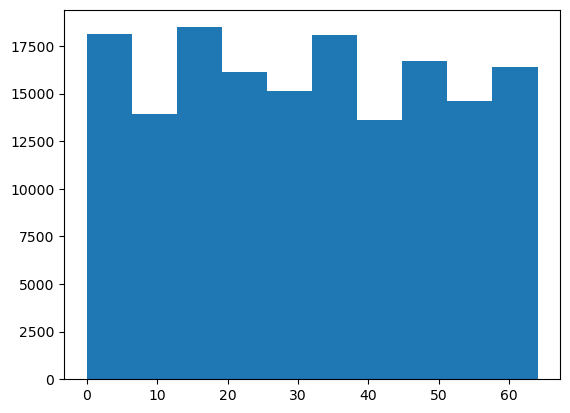

In [8]:
plt.hist(min_idx)